# Project on and Data Science and Machine Learning 
### By Pulkit Mehta

## Data: IBM Human Resource
## Goal: To Predict Attrition of an Employee

## Libraries

In [1]:
import pandas as pd,numpy as np, warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Prepration and Analysis

In [2]:
data= pd.read_csv("data.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Null Features')

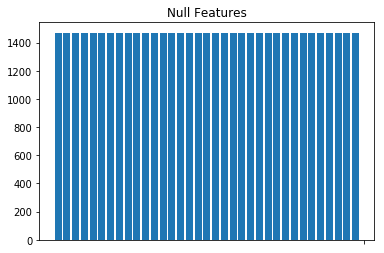

In [4]:
null_f = pd.DataFrame(len(data['Attrition'])-data.isnull().sum(), columns = ['Count'])
plt.bar(null_f.index,null_f.Count)
plt.xticks("")
plt.title("Null Features")

In [5]:
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [6]:
useless_features=[]
for col in data.columns:
    if len(data[col].value_counts())== 1:
        useless_features.append(col)
print("Useless Features:",useless_features)

Useless Features: ['EmployeeCount', 'Over18', 'StandardHours']


In [7]:
data=data.drop(columns=useless_features)

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

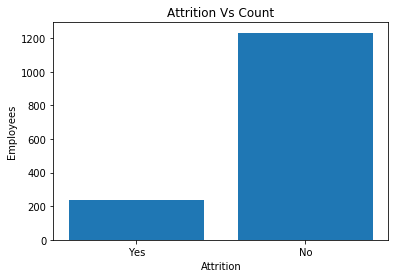

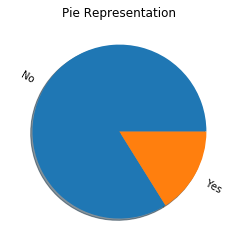

In [11]:
attr= data[data['Attrition']!=0]
no_attr= data[data['Attrition']==0]
plt.bar(['Yes', 'No'], (len(attr),len(no_attr)))
plt.title("Attrition Vs Count")
plt.xlabel('Attrition')
plt.ylabel('Employees')
plt.show()
plt.pie(data.Attrition.value_counts(),labels=['No','Yes'],colors=None, 
        autopct=None, pctdistance=0.6, shadow=True, labeldistance=1.1, 
        startangle=None, radius=None, counterclock=True, wedgeprops=None, 
        textprops=None, center=(0, 0), frame=False, 
        rotatelabels=True, data=None)
plt.title("Pie Representation")
plt.show()

In [12]:
for col in data.columns:
    print('-----------------------\n',data[col].value_counts())

-----------------------
 35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-----------------------
 0    1233
1     237
Name: Attrition, dtype: int64
-----------------------
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------
 691     6
1082    5
329     5
1329    5
530     5
408     5
715     4
589     4
906     4
350     4
827     4
1146    4
1283    4
829     4
688     4
1125    4
430     4
465     4
575     4
147     4
217     4
933     4
117     4
427     4
1490    4
977     4
921     4
1157    4
1469    4
950     4
       ..
862     1
854   

In [13]:
def plot_distribution(var, bin_size):
    print(var,"Distribution:")
    corr = np.round(data['Attrition'].corr(data[var]),3)
    tmp_1= attr[var]
    tmp_2= no_attr[var]
    hist_data = [tmp_1, tmp_2]
    yn=['Yes', 'No']
    plt.hist(hist_data, bins=bin_size, range=None, density=corr, weights=None,
             cumulative=False, bottom=None, histtype='bar',
             align='mid', orientation='vertical', rwidth=None,
             log=False, color=None, label=None, stacked=True, normed=None,
             data=None)
    plt.xlabel(var)
    plt.show()

In [14]:
def barplot(var, xnn):
    print(var,"Vs Employee Count")
    tmp1 = data[data['Attrition']!=0]
    tmp2 = data[data['Attrition']==0]
    tmp3 = pd.DataFrame(pd.crosstab(data[var],data['Attrition']))
    tmp3['Attr%'] = (tmp3[1]/(tmp3[1]+tmp3[0])) * 100
    
    if xnn == True :
        tmp3= tmp3.sort_values(1, ascending = False)
    
    plt.bar((tmp1[var].value_counts().keys().tolist()),
        (tmp1[var].value_counts().values.tolist()),
        width=0.8,
        bottom=None,align='center',
        data=None,alpha=1,color='#ffa600')
    
    plt.bar((tmp2[var].value_counts().keys().tolist()),
        (tmp2[var].value_counts().values.tolist()),
        width=0.8,
        bottom=None,align='center',
        data=None, alpha=0.3, color='#ffa600')
    plt.xlabel(var)
    plt.ylabel("Employee count")
    plt.show()
    print(var,"Vs % Attrition")
    plt.scatter(tmp3.index, tmp3['Attr%'],
                s=None, c=None, marker=None, 
                cmap=None, norm=None, vmin=None, 
                vmax=None, alpha=None, linewidths=None,
                verts=None, edgecolors=None, 
                data=None)
    plt.ylabel("Percentage")
    plt.xlabel(var)
    plt.show()

Age Distribution:


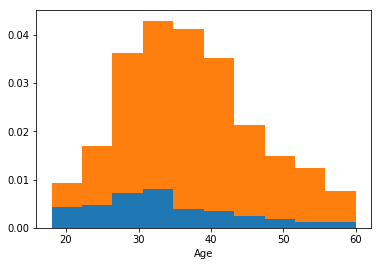

Age Vs Employee Count


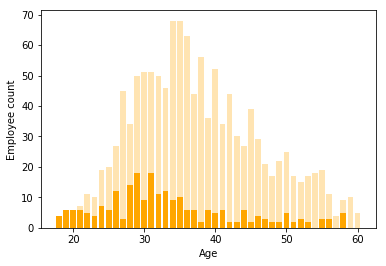

Age Vs % Attrition


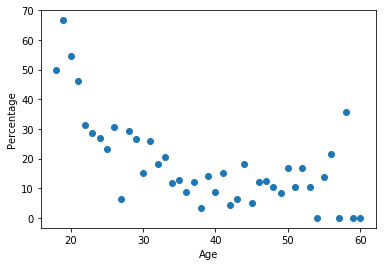

DailyRate Distribution:


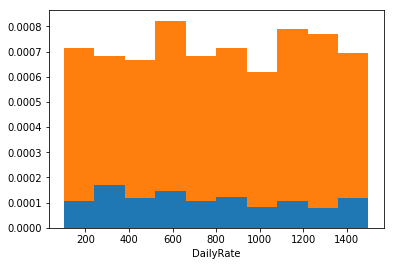

DistanceFromHome Distribution:


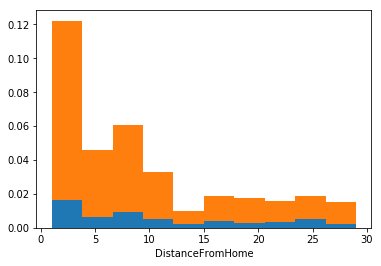

DistanceFromHome Vs Employee Count


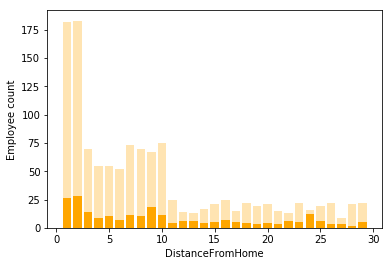

DistanceFromHome Vs % Attrition


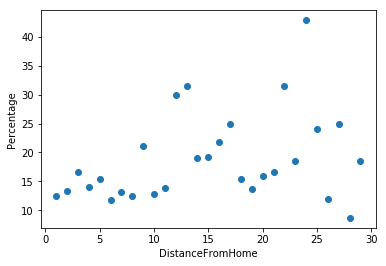

HourlyRate Distribution:


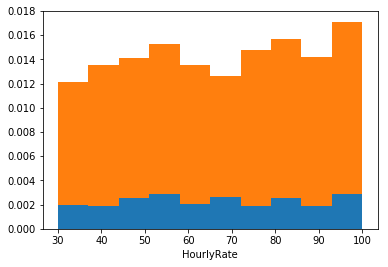

MonthlyIncome Distribution:


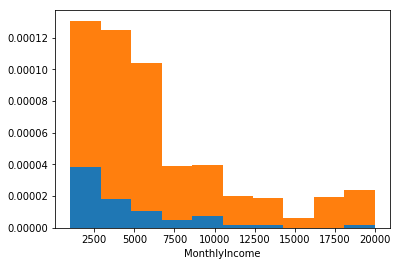

MonthlyRate Distribution:


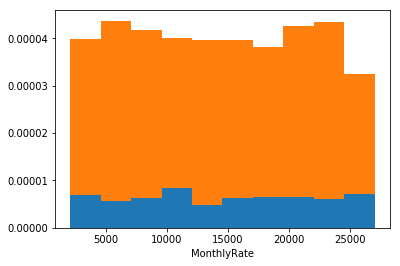

NumCompaniesWorked Distribution:


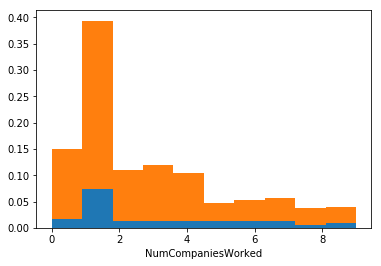

NumCompaniesWorked Vs Employee Count


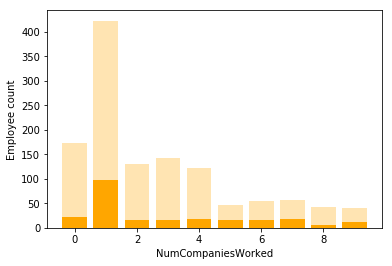

NumCompaniesWorked Vs % Attrition


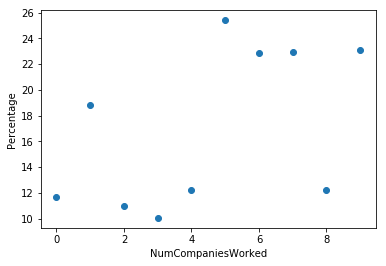

PercentSalaryHike Distribution:


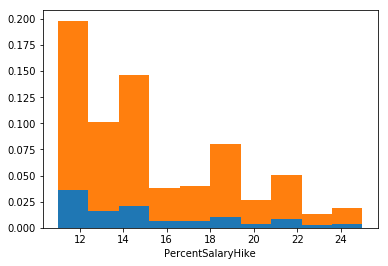

PercentSalaryHike Vs Employee Count


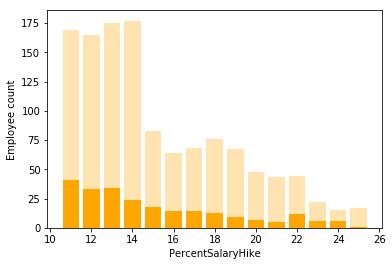

PercentSalaryHike Vs % Attrition


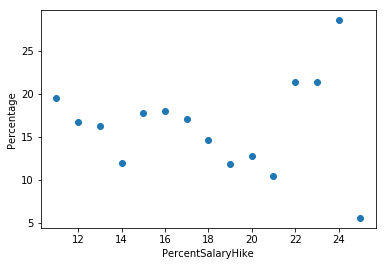

TotalWorkingYears Distribution:


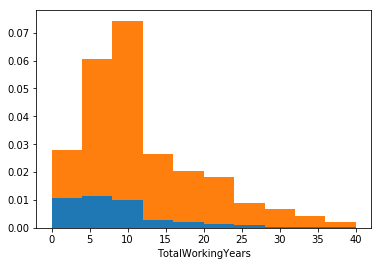

TotalWorkingYears Vs Employee Count


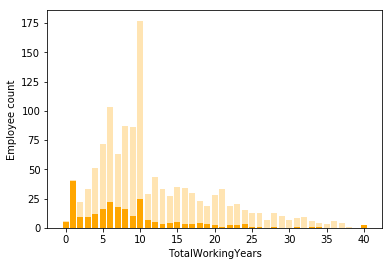

TotalWorkingYears Vs % Attrition


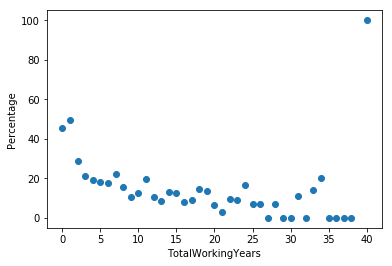

TrainingTimesLastYear Distribution:


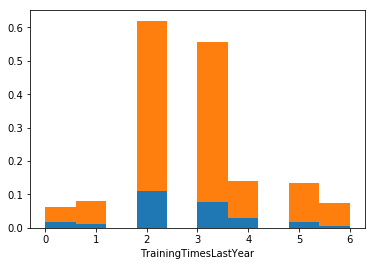

TrainingTimesLastYear Vs Employee Count


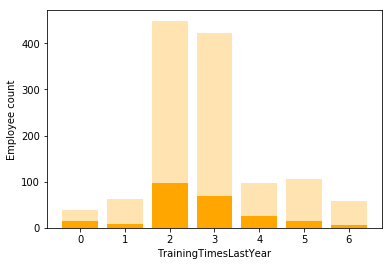

TrainingTimesLastYear Vs % Attrition


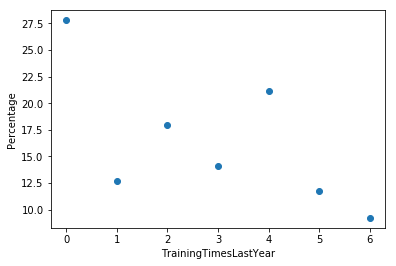

YearsAtCompany Distribution:


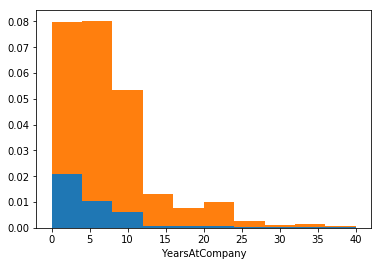

YearsAtCompany Vs Employee Count


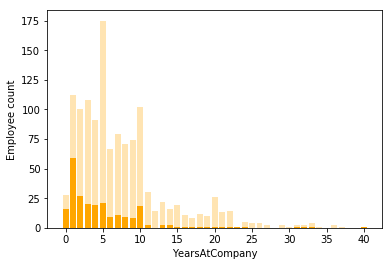

YearsAtCompany Vs % Attrition


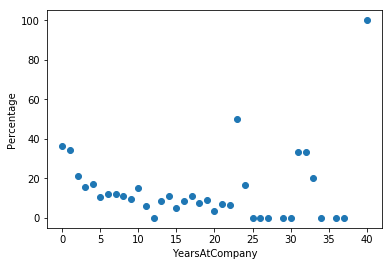

YearsInCurrentRole Distribution:


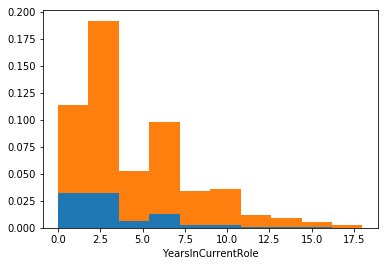

YearsInCurrentRole Vs Employee Count


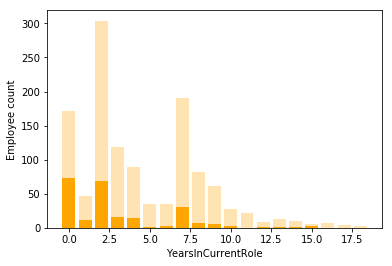

YearsInCurrentRole Vs % Attrition


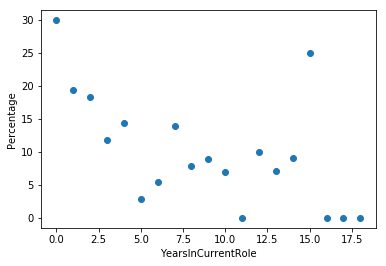

YearsSinceLastPromotion Distribution:


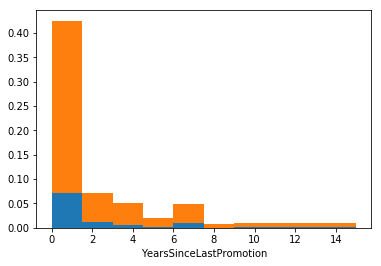

YearsSinceLastPromotion Vs Employee Count


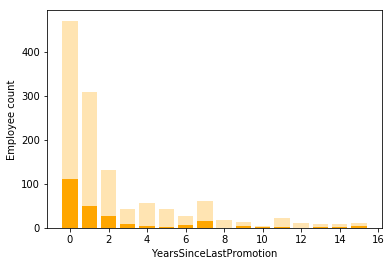

YearsSinceLastPromotion Vs % Attrition


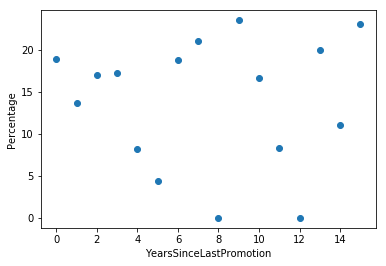

YearsWithCurrManager Distribution:


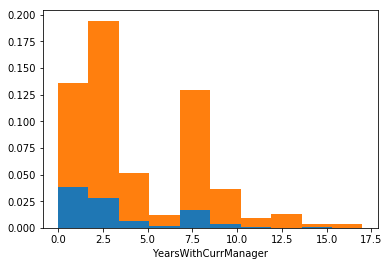

YearsWithCurrManager Vs Employee Count


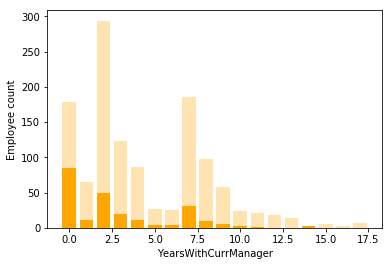

YearsWithCurrManager Vs % Attrition


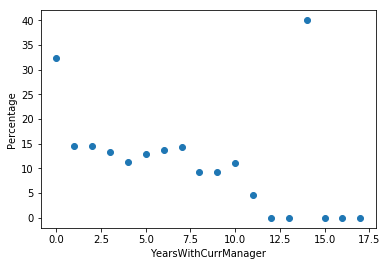

In [15]:
n=10
plot_distribution('Age', n)
barplot('Age', n)
plot_distribution('DailyRate', n)
plot_distribution('DistanceFromHome', n)
barplot('DistanceFromHome', n)
plot_distribution('HourlyRate', n)
plot_distribution('MonthlyIncome', n)
plot_distribution('MonthlyRate', n)
plot_distribution('NumCompaniesWorked', n)
barplot('NumCompaniesWorked',n)
plot_distribution('PercentSalaryHike', n)
barplot('PercentSalaryHike', n) 
plot_distribution('TotalWorkingYears', n)
barplot('TotalWorkingYears', n)
plot_distribution('TrainingTimesLastYear', n)
barplot('TrainingTimesLastYear',n)
plot_distribution('YearsAtCompany', n)
barplot('YearsAtCompany', n)
plot_distribution('YearsInCurrentRole', n)
barplot('YearsInCurrentRole', n)
plot_distribution('YearsSinceLastPromotion', n)
barplot('YearsSinceLastPromotion', n)
plot_distribution('YearsWithCurrManager', n)
barplot('YearsWithCurrManager', n)

In [16]:
def plot_pie(var):
    print(var,"count distribution:")
    colors = ['#003f5c', 
              '#2f4b7c', 
              '#665191', 
              '#a05195', 
              '#d45087', 
              '#f95d6a', 
              '#ff7c43', 
              '#ffa600']
    print("Attrition Yes")
    plt.pie(attr[var].value_counts().values.tolist(),
            explode=None, 
            labels=attr[var].value_counts().keys().tolist(),
            colors=colors, 
            autopct=None, pctdistance=0.6,
            shadow=False, labeldistance=1.1,
            startangle=None, radius=None, 
            counterclock=True, wedgeprops=None,
            textprops=None, center=(0, 0), 
            frame=False, rotatelabels=False, data=None)
    plt.show()
    print("Attrition No")

    plt.pie(no_attr[var].value_counts().values.tolist(),
            explode=None, 
            labels=no_attr[var].value_counts().keys().tolist(),
            colors=colors, 
            autopct=None, pctdistance=0.6,
            shadow=False, labeldistance=1.1,
            startangle=None, radius=None, 
            counterclock=True, wedgeprops=None,
            textprops=None, center=(0, 0), 
            frame=False, rotatelabels=False, data=None)
    plt.show()

Gender count distribution:
Attrition Yes


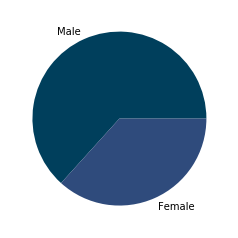

Attrition No


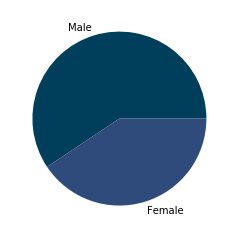

Gender Vs Employee Count


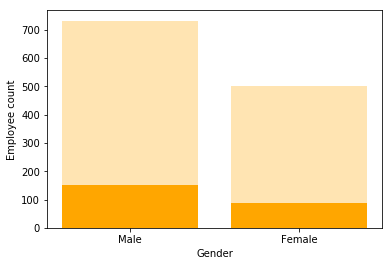

Gender Vs % Attrition


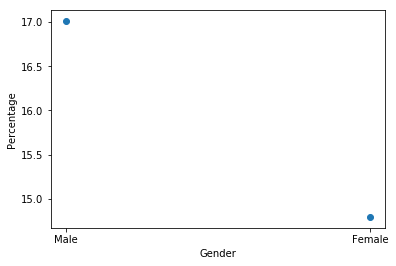

OverTime count distribution:
Attrition Yes


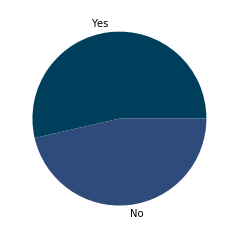

Attrition No


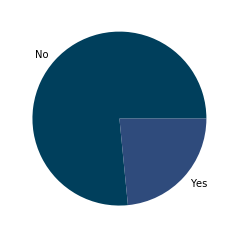

OverTime Vs Employee Count


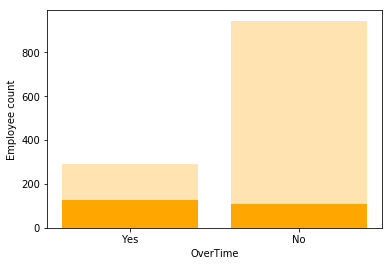

OverTime Vs % Attrition


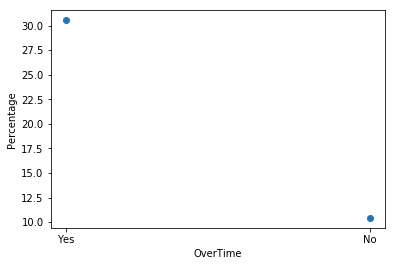

BusinessTravel count distribution:
Attrition Yes


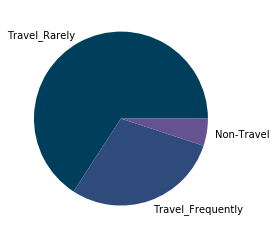

Attrition No


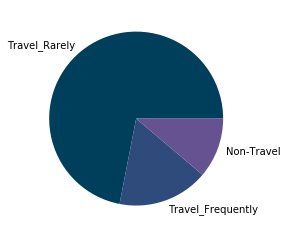

BusinessTravel Vs Employee Count


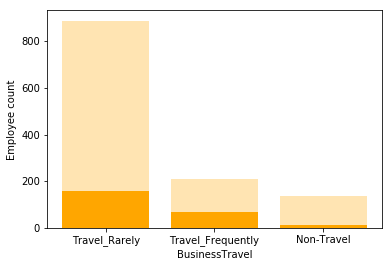

BusinessTravel Vs % Attrition


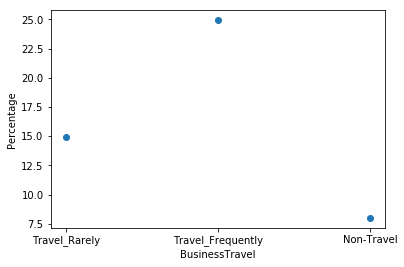

JobRole count distribution:
Attrition Yes


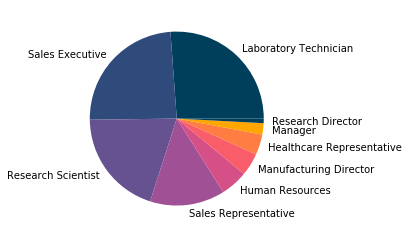

Attrition No


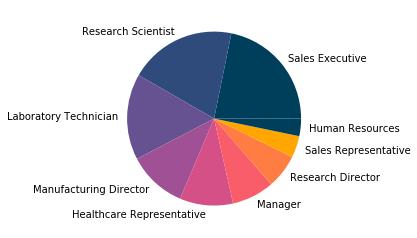

JobRole Vs Employee Count


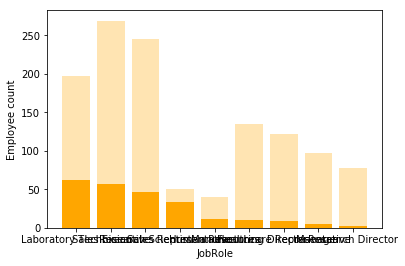

JobRole Vs % Attrition


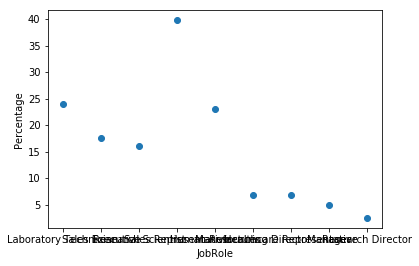

Department count distribution:
Attrition Yes


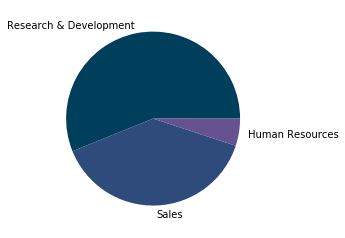

Attrition No


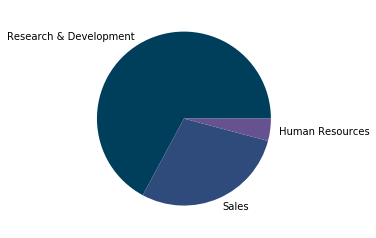

Department Vs Employee Count


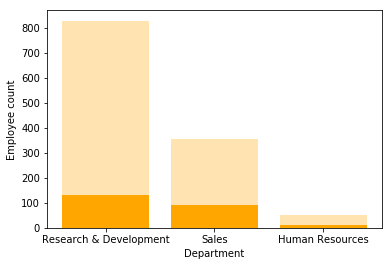

Department Vs % Attrition


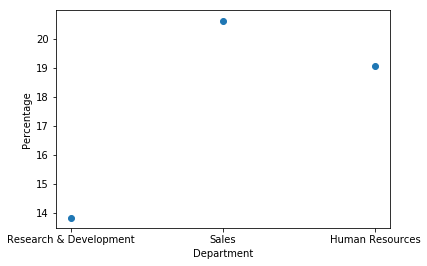

MaritalStatus count distribution:
Attrition Yes


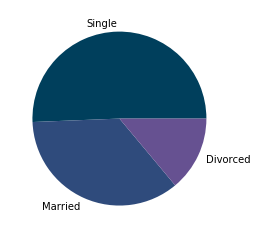

Attrition No


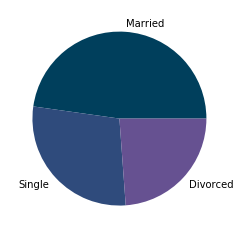

MaritalStatus Vs Employee Count


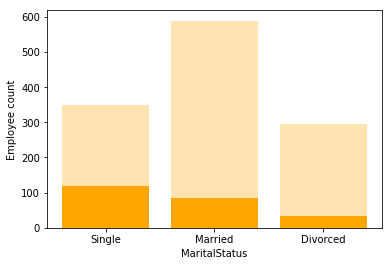

MaritalStatus Vs % Attrition


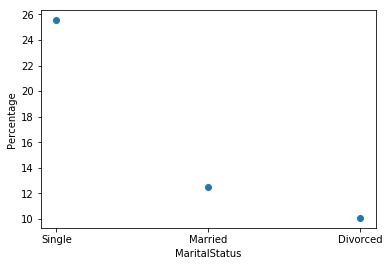

EducationField count distribution:
Attrition Yes


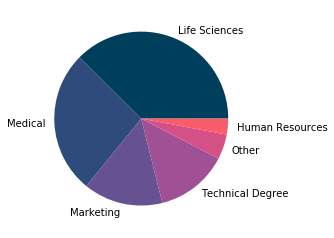

Attrition No


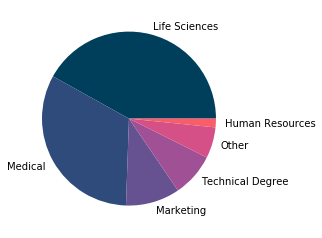

EducationField Vs Employee Count


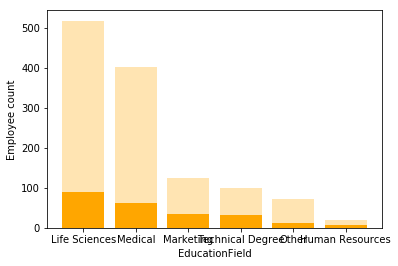

EducationField Vs % Attrition


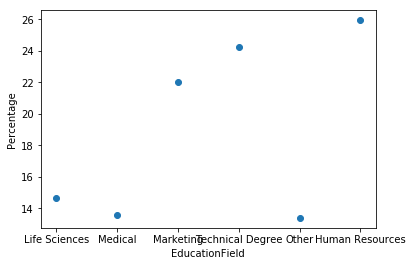

Education count distribution:
Attrition Yes


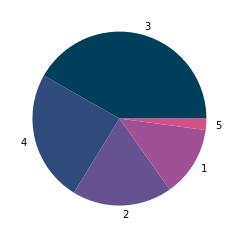

Attrition No


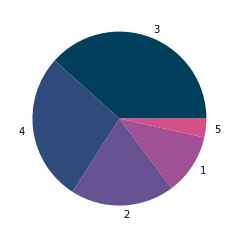

Education Vs Employee Count


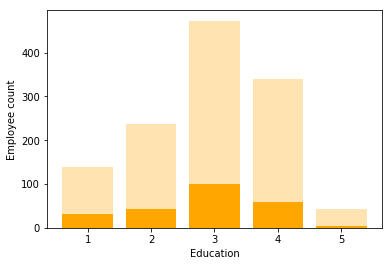

Education Vs % Attrition


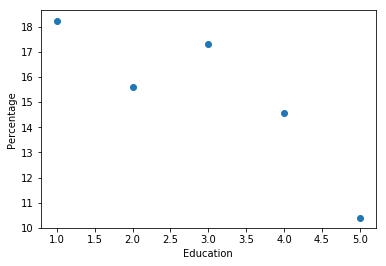

EnvironmentSatisfaction count distribution:
Attrition Yes


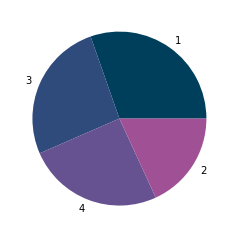

Attrition No


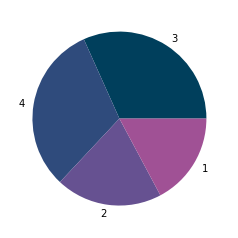

EnvironmentSatisfaction Vs Employee Count


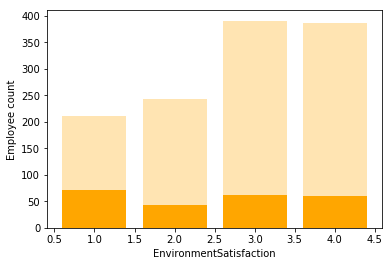

EnvironmentSatisfaction Vs % Attrition


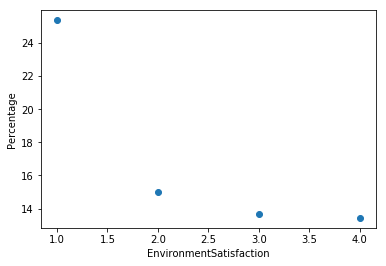

JobInvolvement count distribution:
Attrition Yes


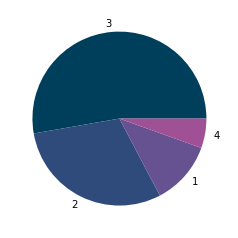

Attrition No


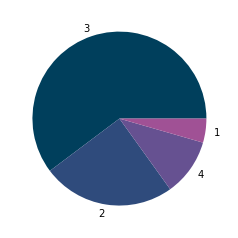

JobInvolvement Vs Employee Count


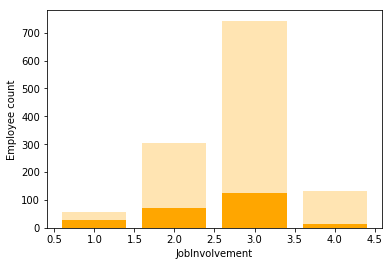

JobInvolvement Vs % Attrition


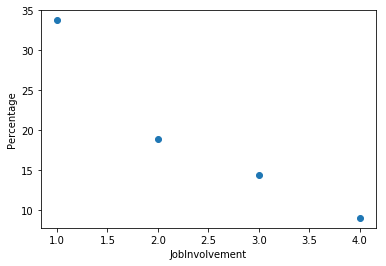

JobLevel count distribution:
Attrition Yes


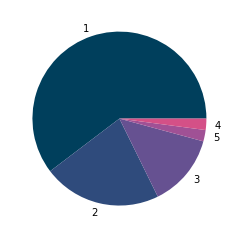

Attrition No


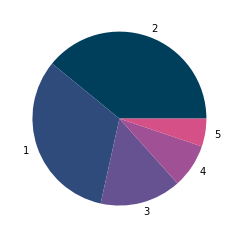

JobLevel Vs Employee Count


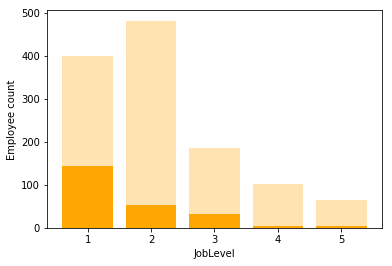

JobLevel Vs % Attrition


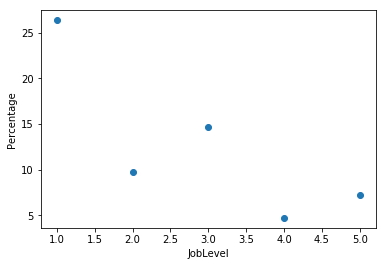

JobSatisfaction count distribution:
Attrition Yes


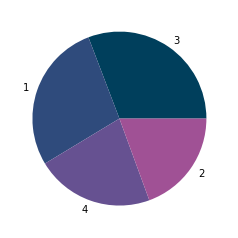

Attrition No


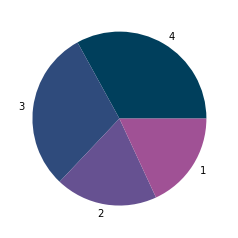

JobSatisfaction Vs Employee Count


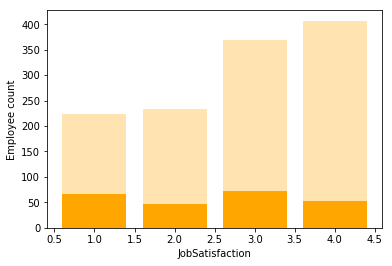

JobSatisfaction Vs % Attrition


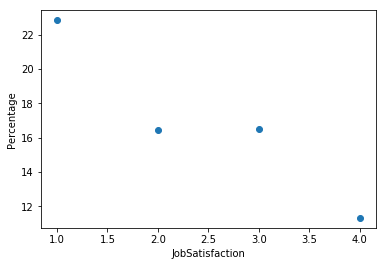

PerformanceRating count distribution:
Attrition Yes


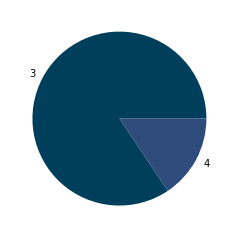

Attrition No


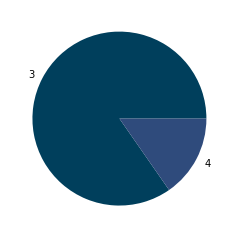

PerformanceRating Vs Employee Count


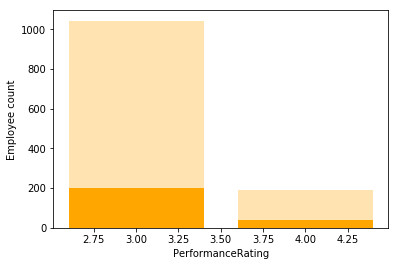

PerformanceRating Vs % Attrition


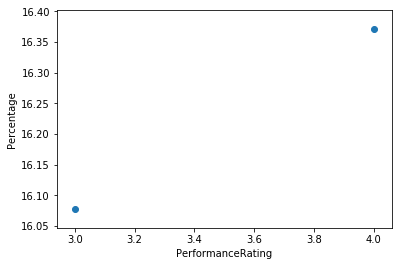

RelationshipSatisfaction count distribution:
Attrition Yes


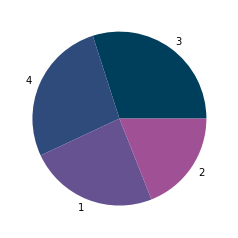

Attrition No


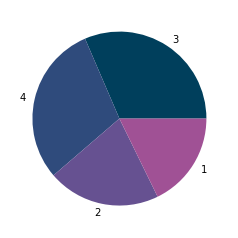

RelationshipSatisfaction Vs Employee Count


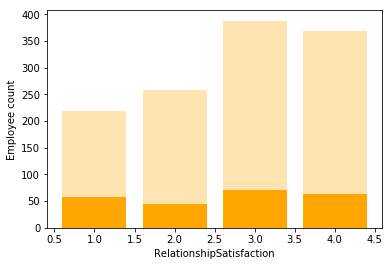

RelationshipSatisfaction Vs % Attrition


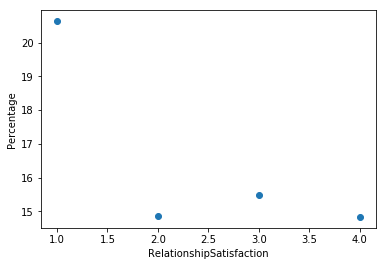

StockOptionLevel count distribution:
Attrition Yes


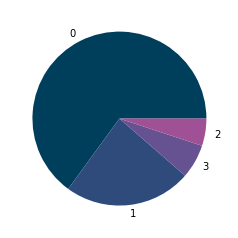

Attrition No


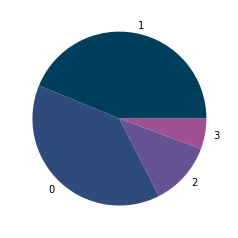

StockOptionLevel Vs Employee Count


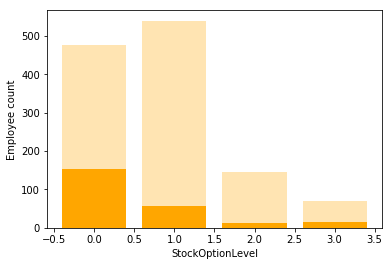

StockOptionLevel Vs % Attrition


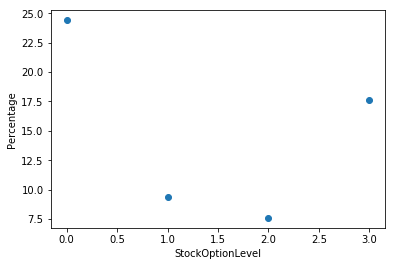

WorkLifeBalance count distribution:
Attrition Yes


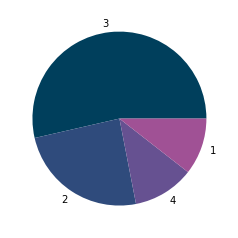

Attrition No


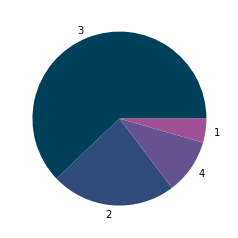

WorkLifeBalance Vs Employee Count


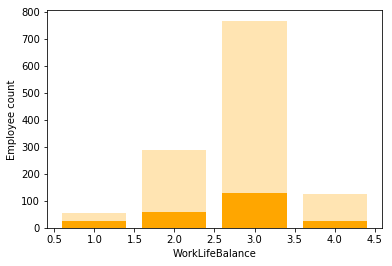

WorkLifeBalance Vs % Attrition


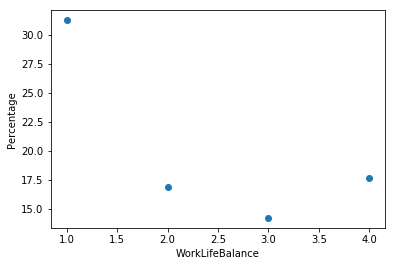

In [17]:
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

## Feature Engineering

In [18]:
categorical=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender',
              'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked'
             ,'OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
             'TrainingTimesLastYear','WorkLifeBalance']
continuous=['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate',
           'PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']

In [19]:
for i in categorical:
    data[i]=data[i].astype(str)

In [20]:
data_encoded=pd.get_dummies(data)

In [21]:
print(data_encoded.info())
data_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 95 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
EmployeeNumber                       1470 non-null int64
HourlyRate                           1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
PercentSalaryHike                    1470 non-null int64
TotalWorkingYears                    1470 non-null int64
YearsAtCompany                       1470 non-null int64
YearsInCurrentRole                   1470 non-null int64
YearsSinceLastPromotion              1470 non-null int64
YearsWithCurrManager                 1470 non-null int64
BusinessTravel_Non-Travel            1470 non-null uint8
BusinessTravel_Travel_Frequently     1

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,...,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,15.209524,11.279592,...,0.048299,0.372109,0.334014,0.083673,0.080952,0.044218,0.054422,0.234014,0.607483,0.104082
std,9.135373,0.367863,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,3.659938,7.780782,...,0.214471,0.483532,0.471805,0.276992,0.272855,0.205648,0.226925,0.423525,0.488477,0.305470
min,18.000000,0.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,12.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,14.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,18.000000,15.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,1.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,25.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
cor=data[continuous].astype(float).corr().values

In [23]:
corr=data[continuous].astype(float).corr()
corr

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,0.010661,-0.001686,-0.010145,0.024287,0.497855,0.028051,0.003634,0.680381,0.311309,0.212901,0.216513
DailyRate,0.010661,1.000000,-0.004985,-0.050990,0.023381,0.007707,-0.032182,0.022704,0.014515,-0.034055,0.009932,-0.033229
DistanceFromHome,-0.001686,-0.004985,1.000000,0.032916,0.031131,-0.017014,0.027473,0.040235,0.004628,0.009508,0.018845,0.010029
EmployeeNumber,-0.010145,-0.050990,0.032916,1.000000,0.035179,-0.014829,0.012648,-0.012944,-0.014365,-0.011240,-0.008416,-0.009019
HourlyRate,0.024287,0.023381,0.031131,0.035179,1.000000,-0.015794,-0.015297,-0.009062,-0.002334,-0.019582,-0.024106,-0.026716
MonthlyIncome,0.497855,0.007707,-0.017014,-0.014829,-0.015794,1.000000,0.034814,-0.027269,0.772893,0.514285,0.363818,0.344978
MonthlyRate,0.028051,-0.032182,0.027473,0.012648,-0.015297,0.034814,1.000000,-0.006429,0.026442,-0.023655,-0.012815,0.001567
PercentSalaryHike,0.003634,0.022704,0.040235,-0.012944,-0.009062,-0.027269,-0.006429,1.000000,-0.020608,-0.035991,-0.001520,-0.022154
TotalWorkingYears,0.680381,0.014515,0.004628,-0.014365,-0.002334,0.772893,0.026442,-0.020608,1.000000,0.628133,0.460365,0.404858
YearsAtCompany,0.311309,-0.034055,0.009508,-0.011240,-0.019582,0.514285,-0.023655,-0.035991,0.628133,1.000000,0.758754,0.618409


In [24]:
cor.shape

(12, 12)

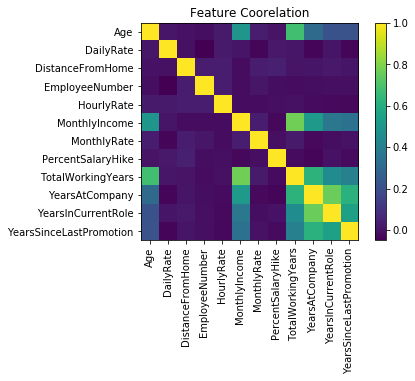

In [25]:
plt.imshow(cor, cmap=None, norm=None, aspect=None,
           interpolation=None, alpha=None, vmin=None,
           vmax=None, origin=None, extent=None, shape=None,
           filternorm=1, filterrad=4.0, imlim=None, resample=None,
           url=None, data=None)
plt.colorbar()
plt.title("Feature Coorelation")
plt.yticks(range(len(corr.index)), corr.index)
plt.xticks(range(len(corr.index)), corr.index,rotation='vertical')
plt.show()

In [26]:
def model_performance_plot(model):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.imshow(conf_matrix)
    plt.xticks([0,1],['N','P'])
    plt.xlabel("True")
    plt.yticks([0,1],['N','P'])
    plt.ylabel("Predicted")

    plt.show()
    tp=conf_matrix[1,1]
    fn=conf_matrix[1,0]
    fp=conf_matrix[0,1]
    tn=conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))
    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T
    plt.bar(['Accuracy' , 'Precision', 'Recall', 'F1_score'],
            show_metrics[0].values, width=0.8, 
            bottom=None,
            align='center', data=None)
    plt.show()  

In [27]:
def feature_imp(model):
    coeff = pd.DataFrame(model.features_importances_)
    column_data= pd.DataFrame(list(data))
    coef_sumry= (pd.merge(coeffcients, column_data, left_index=True,
                         right_index= True,how="left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",
                                           ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0] 
    plt.bar(coef_sumry["features"], coef_sumry["coefficients"])

In [28]:
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

## Cooked Data

In [29]:
X=data_encoded.drop(columns='Attrition').values
y=data_encoded['Attrition'].values

In [30]:
X.shape, y.shape

((1470, 94), (1470,))

## Train-Test Splitting

In [31]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.25,
                                                 random_state=42)

In [32]:
X_train.shape,X_test.shape

((1102, 94), (368, 94))

In [33]:
scaler=StandardScaler().fit(X_train)

In [34]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X= scaler.fit_transform(X)

## Model Selection

In [35]:
models =[SVC(),
         RandomForestClassifier(),
         LogisticRegression(),
         KNeighborsClassifier()]

In [36]:
param_grid=[
    [
        {
            'kernel':['rbf'],
            'gamma' :[0.001,0.01,0.1,1,10,100],
            'C' : [0.001,0.01,0.1,1,10,100]
        }
    ],
    [
        {
            'n_estimators' :[10,50,100,200,500,1000],
            'max_depth': [3, 4, 5, 10, 12]
            
        }
    ],
    [
        {
            'C' :[0.001,0.01,0.1,1,10,100]
        }
    ],
    [
        {
            'n_neighbors' : [2,3,4,5,5]
        }
    ]
]

In [37]:
predictions=[]
def select_model(a,b):
    best_models=[]
    for model,i in zip(models, param_grid):
        grid=GridSearchCV(model,i, cv=5, n_jobs=-1)
        grid.fit(a,b)
        print(
             '-----------------------------------\nBest Parameters:',
             grid.best_params_,
             '\nBest CV Score:',
             grid.best_score_,
            '\nModel Info:\n',
             grid.best_estimator_,
            '\n\n'
        )
        best_models.append(grid.best_estimator_)
        predictions.append(grid.best_estimator_.predict(X_test))
    return best_models

In [38]:
predictions=[]
best_models=select_model(X_train,y_train)

-----------------------------------
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} 
Best CV Score: 0.8765880217785844 
Model Info:
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 


-----------------------------------
Best Parameters: {'max_depth': 12, 'n_estimators': 200} 
Best CV Score: 0.8566243194192378 
Model Info:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 


-----------------------------------
Best Parameters: {'C': 0.0

In [39]:
best_models

[SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=12, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski

------------------------------
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


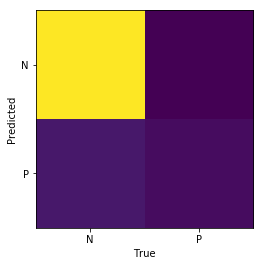

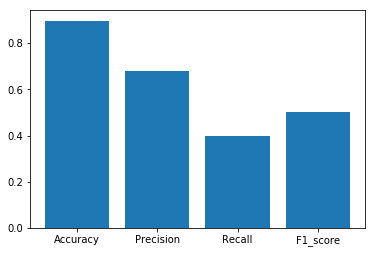

------------------------------
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


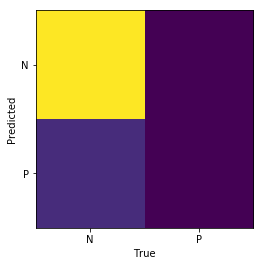

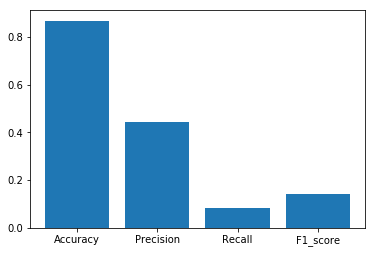

------------------------------
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


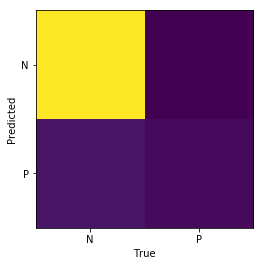

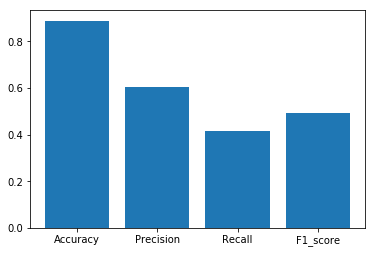

------------------------------
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


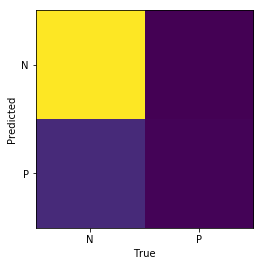

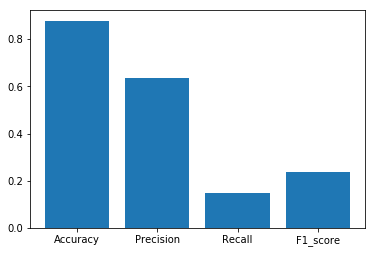

In [40]:
for i in range(4):
    print('------------------------------\n'
          ,str(models[i]))    
    y_pred=predictions[i]
    model_performance_plot(best_models[i])


## Resultant Model

In [41]:
fitted_models=[]
for model in best_models:
    fitted_models.append(model.fit(X_train,y_train))

## Final Model Accuracy

In [42]:
pred=[]
for model in fitted_models:
    pred.append(model.predict(X_test))
results=[]

for j in range(len(pred[0])):
    ones=0
    Zeros=0
    result=0
    for i in range(4):
        if pred[i][j] == 1:
            ones=ones+1
        else:
            Zeros=Zeros+1
    if ones>Zeros:
        result=1
    elif Zeros>ones:
        result=0
    else:
        result=1
    results.append(result)

results=np.array(results)

wrong=0
for i in range(len(results)):    
    if results[i]!=y_test[i]:
        wrong=wrong+1

print("Final Test Accuracy:",(len(results)-wrong)/len(results))

pred=[]
for model in fitted_models:
    pred.append(model.predict(X_train))
    
results=[]
for j in range(len(pred[0])):
    ones=0
    Zeros=0
    result=0
    for i in range(4):
        if pred[i][j] == 1:
            ones=ones+1
        else:
            Zeros=Zeros+1
    if ones>Zeros:
        result=1
    elif Zeros>ones:
        result=0
    else:
        result=1
    results.append(result)
    
results=np.array(results)

wrong=0
for i in range(len(results)):    
    if results[i]!=y_train[i]:
        wrong=wrong+1
        
print("Final Train Accuracy:",(len(results)-wrong)/len(results))

Final Test Accuracy: 0.8940217391304348
Final Train Accuracy: 0.926497277676951


## Final Predictor

In [43]:
fitted_models=[]
for model in best_models:
    fitted_models.append(model.fit(X,y))

In [44]:
def predict(X):
    pred=[]
    for model in fitted_models:
        pred.append(model.predict([X]))
        results=[]
    
    for j in range(len(pred[0])):
        ones=0
        Zeros=0
        result=0
        for i in range(4):
            if pred[i][j] == 1:
                ones=ones+1
            else:
                Zeros=Zeros+1
        if ones>Zeros:
            result=1
            print("More Chance of Attrition")
        elif Zeros>ones:
            result=0
            print("Less Chance of Attrition")
        else:
            result=1
            print("More Chance of Attrition")
        results.append(result)
    return results
    

## Usage Example

In [45]:
pd.DataFrame(X_train[37]).T

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.015351,0.437924,-1.017204,0.286503,-0.521229,0.018754,-0.621957,-0.617036,0.369954,1.164059,...,-0.220284,1.294124,-0.7023,-0.303596,-0.296408,-0.21801,-0.235702,1.755415,-1.242994,-0.324524


In [46]:
X=X_train[37]

In [47]:
predict(X)

Less Chance of Attrition


[0]

# --------------------------------------------------------------------------------------------------------